In [54]:
### Use this workbook SEVENTH in sequence.

### This workbook does inferential statistics on the combined data from UN Votes and US Aid.

# Initial setup

import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_rows = 800

data = pd.read_csv('Modified_Data/VoteDiffsWithTotalAid.csv')
data.index.name = 'record'
data

,Unnamed: 0,issue,membership,vote_foreign,code,name,year,aid,total_aid,vote_usa,vote_diff
record,,,,,,,,,,,
0,0,20.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
1,1,21.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
2,2,22.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,3,4
3,3,23.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
4,4,24.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
5,5,25.000,1.000,1,AFG,Afghanistan,1946,0.000,0.000,1,0
6,6,26.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,3,1
7,7,27.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1
8,8,28.000,1.000,2,AFG,Afghanistan,1946,0.000,0.000,1,1


In [55]:
# Show all correlations between all variables in the combined dataset.

pd.options.display.float_format = '{:.3f}'.format
from scipy import stats 
data.corr()

,Unnamed: 0,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff
Unnamed: 0,1.000,0.009,nan,-0.000,0.009,-0.033,-0.056,0.003,0.007
issue,0.009,1.000,nan,-0.091,0.904,-0.022,0.078,0.222,0.209
membership,nan,nan,nan,nan,nan,nan,nan,nan,nan
vote_foreign,-0.000,-0.091,nan,1.000,-0.119,0.042,0.087,0.038,-0.340
year,0.009,0.904,nan,-0.119,1.000,-0.032,0.086,0.248,0.229
aid,-0.033,-0.022,nan,0.042,-0.032,1.000,0.438,-0.008,-0.028
total_aid,-0.056,0.078,nan,0.087,0.086,0.438,1.000,0.019,-0.053
vote_usa,0.003,0.222,nan,0.038,0.248,-0.008,0.019,1.000,0.663
vote_diff,0.007,0.209,nan,-0.340,0.229,-0.028,-0.053,0.663,1.000


In [56]:
# Multiply coefficient of regression by 1000 to confirm that it is extremely close to zero.

result = stats.pearsonr(data['vote_diff'], data['total_aid'])
1000 * result[1]

0.0

In [57]:
result

(-0.053015525145596785, 0.0)

In [58]:
# function to calculate Cohen's d for independent samples
import numpy as np

def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [59]:
# See how many country-years featured more than $10 billion in aid
large_aid = data[data['total_aid'] > 10**10]
large_aid.shape

(122093, 11)

In [60]:
# See how many country-years featured less than $100 million in aid
small_aid = data[data['total_aid'] < 10**8]
small_aid.shape

(230364, 11)

In [61]:
# Calcualte the cohen d factor to gauge the practical signifance of the effect of total aid on voting alignment
cohend(large_aid['vote_diff'], small_aid['vote_diff'])

-0.014222947163144296

In [62]:
# View all standard deviations, for reference.
data.std()

Unnamed: 0          245928.265
issue                 1578.414
membership               0.000
vote_foreign             0.599
year                    16.745
aid              742259539.138
total_aid      16734816906.960
vote_usa                 0.837
vote_diff                1.728
dtype: float64

In [63]:
#View summary statistics on the combined dataset
data.describe()

,Unnamed: 0,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff
count,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000,851920.000
mean,425959.500,3192.406,1.000,1.340,1988.628,158674359.578,6158226834.062,2.281,1.906
std,245928.265,1578.414,0.000,0.599,16.745,742259539.138,16734816906.960,0.837,1.728
min,0.000,3.000,1.000,1.000,1946.000,-426185314.000,0.000,1.000,0.000
25%,212979.750,1902.000,1.000,1.000,1978.000,59288.000,74602129.000,2.000,0.000
50%,425959.500,3259.000,1.000,1.000,1987.000,10153011.500,754499184.000,3.000,1.000
75%,638939.250,4477.000,1.000,2.000,2003.000,69707652.000,3607588367.000,3.000,4.000
max,851919.000,9056.000,1.000,3.000,2017.000,34916000823.000,227634027836.000,3.000,4.000


In [64]:
bankdata = pd.read_csv('Modified_Data/AidVotesBank.csv')
bankdata.describe()

,Unnamed: 0,Unnamed: 0.1,issue,membership,vote_foreign,year,aid,total_aid,vote_usa,vote_diff,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
count,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,790903.000,...,771601.000,693105.000,109955.000,772575.000,61942.000,653501.000,772524.000,790238.000,790446.000,693313.000
mean,395451.000,421832.579,3339.162,1.000,1.320,1990.755,148387622.282,6418645108.371,2.310,1.956,...,4.105,10401.672,39.533,63.809,77.766,34.259,176.926,30552226.378,50.737,252759947967.113
std,228314.174,243855.008,1446.835,0.000,0.576,14.910,667522295.043,17147946489.653,0.825,1.727,...,2.019,16865.791,9.589,11.245,22.644,24.873,921.989,113625100.005,24.518,1006875883935.275
min,0.000,641.000,627.000,1.000,1.000,1960.000,-16211959.000,0.000,1.000,0.000,...,1.052,133.967,21.000,18.907,5.405,0.005,0.632,9394.000,0.000,29010251.779
25%,197725.500,212772.500,2121.000,1.000,1.000,1980.000,98893.000,101368922.000,2.000,0.000,...,2.140,1108.586,32.000,55.139,65.145,17.810,17.697,1823216.000,30.846,3988772862.249
50%,395451.000,422440.000,3422.000,1.000,1.000,1989.000,11467648.000,834375199.000,3.000,1.000,...,3.843,3358.096,37.700,66.911,87.804,28.552,51.552,6443751.000,52.085,16181972308.499
75%,593176.500,634207.500,4538.000,1.000,2.000,2004.000,69910006.000,3910736331.000,3.000,4.000,...,5.979,12328.156,46.800,72.605,94.900,44.346,122.210,19413000.000,71.465,124233662847.219
max,790902.000,851919.000,9056.000,1.000,3.000,2017.000,14712672876.000,227634027836.000,3.000,4.000,...,8.462,193745.575,65.800,85.417,99.998,228.994,19196.000,1386395000.000,97.846,17348626599500.000


In [65]:
bankdata.head()

,Unnamed: 0,Unnamed: 0.1,issue,membership,vote_foreign,code,name_x,year,aid,total_aid,...,fertility,GDPpercap,gini,life_exp,literacy,exports,pop_density,pop,rural,gdp
0,0,641,627.000,1.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
1,1,642,628.000,1.000,2,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
2,2,643,629.000,1.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
3,3,644,630.000,1.000,3,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan
4,4,645,631.000,1.000,1,AFG,Afghanistan,1960,69454739.000,673372854.000,...,7.450,nan,nan,32.446,nan,4.132,nan,8996973.000,91.599,nan


In [66]:
# Conduct a linear regression to predict voting alignment using only total aid

import statsmodels.api as sm
from statsmodels.formula.api import ols
mod_aid = ols('vote_diff ~ total_aid', data).fit()
print(mod_aid.summary())

                            OLS Regression Results                            
Dep. Variable:              vote_diff   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2401.
Date:                Sun, 24 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:35:17   Log-Likelihood:            -1.6737e+06
No. Observations:              851920   AIC:                         3.347e+06
Df Residuals:                  851918   BIC:                         3.347e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9395      0.002    973.487      0.0

In [67]:
# Conduct a multi-variable regression using both foreign aid and domestic economic variables

vote_endog = bankdata[['vote_diff']]
vote_exog = bankdata[['total_aid', 'GDPpercap', 'debt', 'gini', 'exports']]
vote_exog = sm.add_constant(vote_exog, has_constant='add')
mod_econ = sm.OLS(vote_endog, vote_exog, missing='drop').fit()
print(mod_econ.summary())

                            OLS Regression Results                            
Dep. Variable:              vote_diff   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     264.6
Date:                Sun, 24 Nov 2019   Prob (F-statistic):          1.73e-277
Time:                        00:35:18   Log-Likelihood:                -56968.
No. Observations:               28780   AIC:                         1.139e+05
Df Residuals:                   28774   BIC:                         1.140e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5688      0.065     24.033      0.0

In [68]:
# Calculate the Variance Inflation Factor to investigate how serious multi-collinearity is in this dataset

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = vote_exog.dropna()
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const       39.966
total_aid    1.112
GDPpercap    1.122
debt         1.022
gini         1.189
exports      1.219
dtype: float64

In [69]:
bankdata.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'issue', u'membership',
       u'vote_foreign', u'code', u'name_x', u'year', u'aid', u'total_aid',
       u'vote_usa', u'vote_diff', u'name_y', u'debt', u'energy', u'fertility',
       u'GDPpercap', u'gini', u'life_exp', u'literacy', u'exports',
       u'pop_density', u'pop', u'rural', u'gdp'],
      dtype='object')

In [70]:
# Continue reviewing summary statistics
bankdata['debt'].describe()

count   91287.000
mean       58.596
std        90.283
min         1.890
25%        29.998
50%        48.353
75%        69.734
max      2007.964
Name: debt, dtype: float64

In [71]:
# Calculate a compound exogenous factor called "reliance" intended to estimate the extent to which a country's economy
# is reliant or dependent upon US foreign aid.

bankdata['reliance'] = bankdata['debt'] * bankdata['total_aid'] / bankdata['gdp']
bankdata['reliance'].describe()

count   90919.000
mean       16.785
std        67.688
min         0.000
25%         0.288
50%         1.581
75%         8.031
max       836.701
Name: reliance, dtype: float64

In [72]:
# Run a multi-variable regression using the reliance variable defined above.

vote_endog = bankdata[['vote_diff']]
vote_exog = bankdata[['reliance', 'gini', 'exports']]
vote_exog = sm.add_constant(vote_exog, has_constant='add')
mod_rely = sm.OLS(vote_endog, vote_exog, missing='drop').fit()
print(mod_rely.summary())

                            OLS Regression Results                            
Dep. Variable:              vote_diff   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     159.3
Date:                Sun, 24 Nov 2019   Prob (F-statistic):          1.94e-102
Time:                        00:35:18   Log-Likelihood:                -57378.
No. Observations:               28780   AIC:                         1.148e+05
Df Residuals:                   28776   BIC:                         1.148e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9024      0.060     14.974      0.0

In [73]:
# Fit the data to a constant scale to rule out the possibility that the lack of correlation is being driven by
# mismatched scales, e.g., large amounts of foreign aid (10 billion USD) compared to small amounts
# of vote alignment (4 points on an arbitrary scale)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

subset = bankdata[['vote_diff', 'total_aid', 'GDPpercap', 'debt', 'gini', 'exports']]

scaler.fit(subset)
bank_normalized = scaler.transform(subset)
bank_normalized

array([[1.        , 0.00295814,        nan,        nan,        nan,
        0.01802212],
       [0.25      , 0.00295814,        nan,        nan,        nan,
        0.01802212],
       [1.        , 0.00295814,        nan,        nan,        nan,
        0.01802212],
       ...,
       [1.        , 0.01761223, 0.00583309,        nan,        nan,
        0.08292198],
       [1.        , 0.01761223, 0.00583309,        nan,        nan,
        0.08292198],
       [1.        , 0.01761223, 0.00583309,        nan,        nan,
        0.08292198]])

In [74]:
# Normalize all variables and then re-run the multi-variable regression with both foreign aid and domestic economic
# variables to see if this affects the strength of the correlations.

vote_endog = bank_normalized[:, 0]
vote_exog = bank_normalized[:, 1:]
vote_exog = sm.add_constant(vote_exog, has_constant='add')
mod_norm = sm.OLS(vote_endog, vote_exog, missing='drop').fit()
print(mod_norm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     264.6
Date:                Sun, 24 Nov 2019   Prob (F-statistic):          1.73e-277
Time:                        00:35:20   Log-Likelihood:                -17070.
No. Observations:               28780   AIC:                         3.415e+04
Df Residuals:                   28774   BIC:                         3.420e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4837      0.011     45.906      0.0

In [75]:
# Repeat the regressions with scaling and normalizing, but this time leaving out foreign aid, to see how that affects
# the coefficients

scaler2 = MinMaxScaler()

subset2 = bankdata[['vote_diff', 'GDPpercap', 'debt', 'gini', 'exports']]

scaler2.fit(subset2)
bank_normalized2 = scaler2.transform(subset2)
bank_normalized2

array([[1.        ,        nan,        nan,        nan, 0.01802212],
       [0.25      ,        nan,        nan,        nan, 0.01802212],
       [1.        ,        nan,        nan,        nan, 0.01802212],
       ...,
       [1.        , 0.00583309,        nan,        nan, 0.08292198],
       [1.        , 0.00583309,        nan,        nan, 0.08292198],
       [1.        , 0.00583309,        nan,        nan, 0.08292198]])

In [76]:
vote_endog = bank_normalized2[:, 0]
vote_exog = bank_normalized2[:, 1:]
vote_exog = sm.add_constant(vote_exog, has_constant='add')
mod_norm_no_aid = sm.OLS(vote_endog, vote_exog, missing='drop').fit()
print(mod_norm_no_aid.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     330.6
Date:                Sun, 24 Nov 2019   Prob (F-statistic):          1.10e-278
Time:                        00:35:20   Log-Likelihood:                -17071.
No. Observations:               28780   AIC:                         3.415e+04
Df Residuals:                   28775   BIC:                         3.419e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4855      0.010     47.649      0.0

In [77]:
# The model with the lowest AIC uses economic variables only; dropping aid from the model does not appear to lose any
# information.

AIC_results = pd.DataFrame({'models': ['Aid Only', 'Aid plus Economic Variables', 'Reliance on Aid', 'Normalized with Aid and Economic Variables', 'Normalized with Economic Variables Only'],
              'AIC': [mod_aid.aic, mod_econ.aic, mod_rely.aic, mod_norm.aic, mod_norm_no_aid.aic]})
AIC_results

,AIC,models
0,3347347.143,Aid Only
1,113947.887,Aid plus Economic Variables
2,114763.296,Reliance on Aid
3,34152.784,Normalized with Aid and Economic Variables
4,34151.202,Normalized with Economic Variables Only


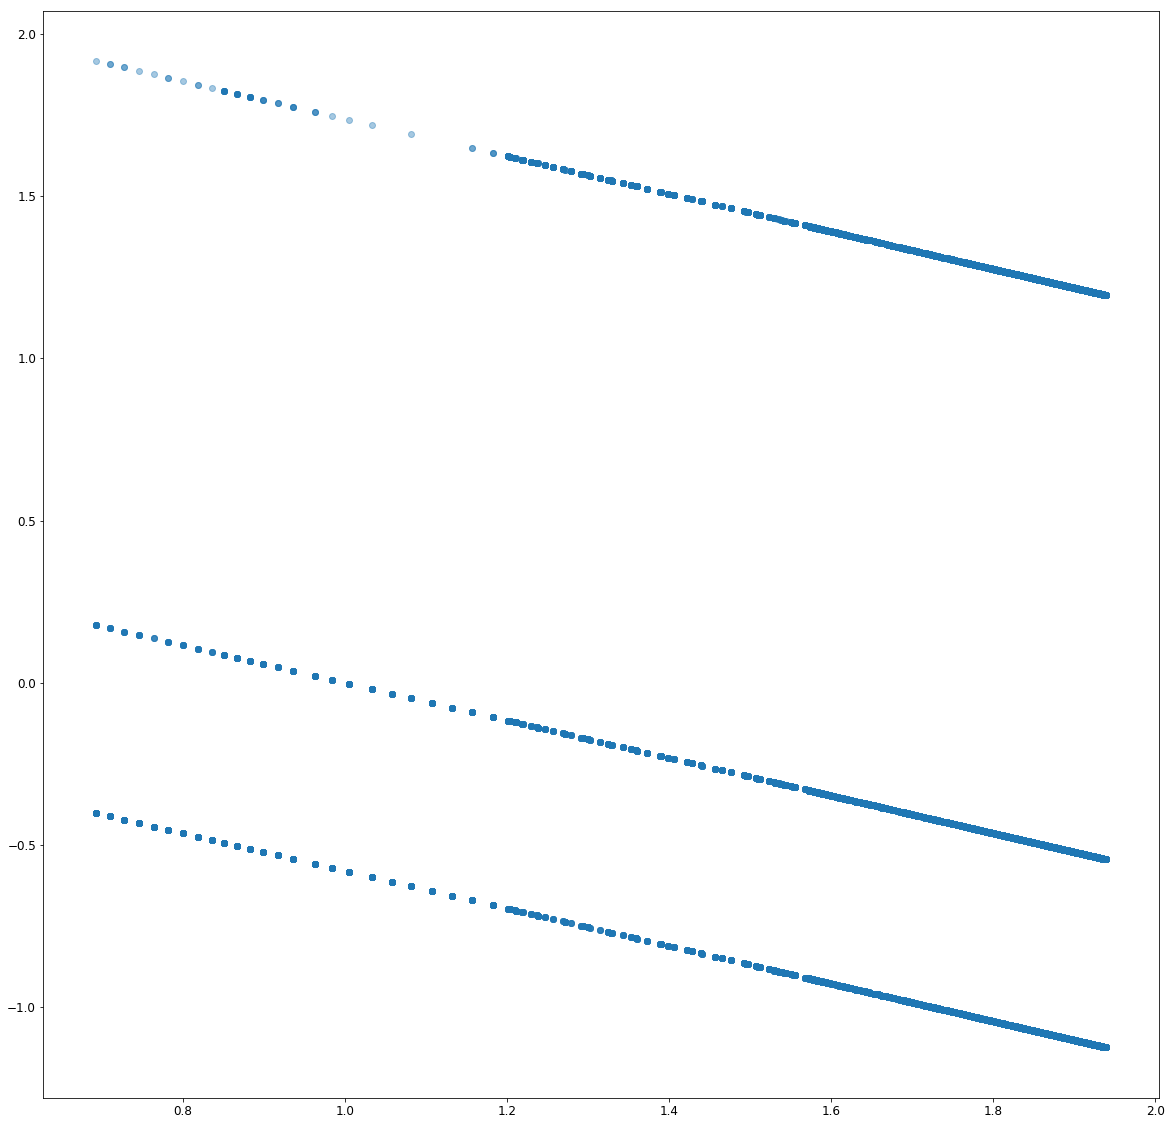

In [78]:
# Plot the residuatls against the fitted values to see that the results are not randomly distributed. This is a problem,
# but I am not sure of the cause and not sure what I could do to fix it.

import matplotlib.pyplot as plt

predictions = mod_aid.fittedvalues
residuals = mod_aid.resid_pearson
plt.scatter(predictions, residuals, alpha=0.4)
plt.show()

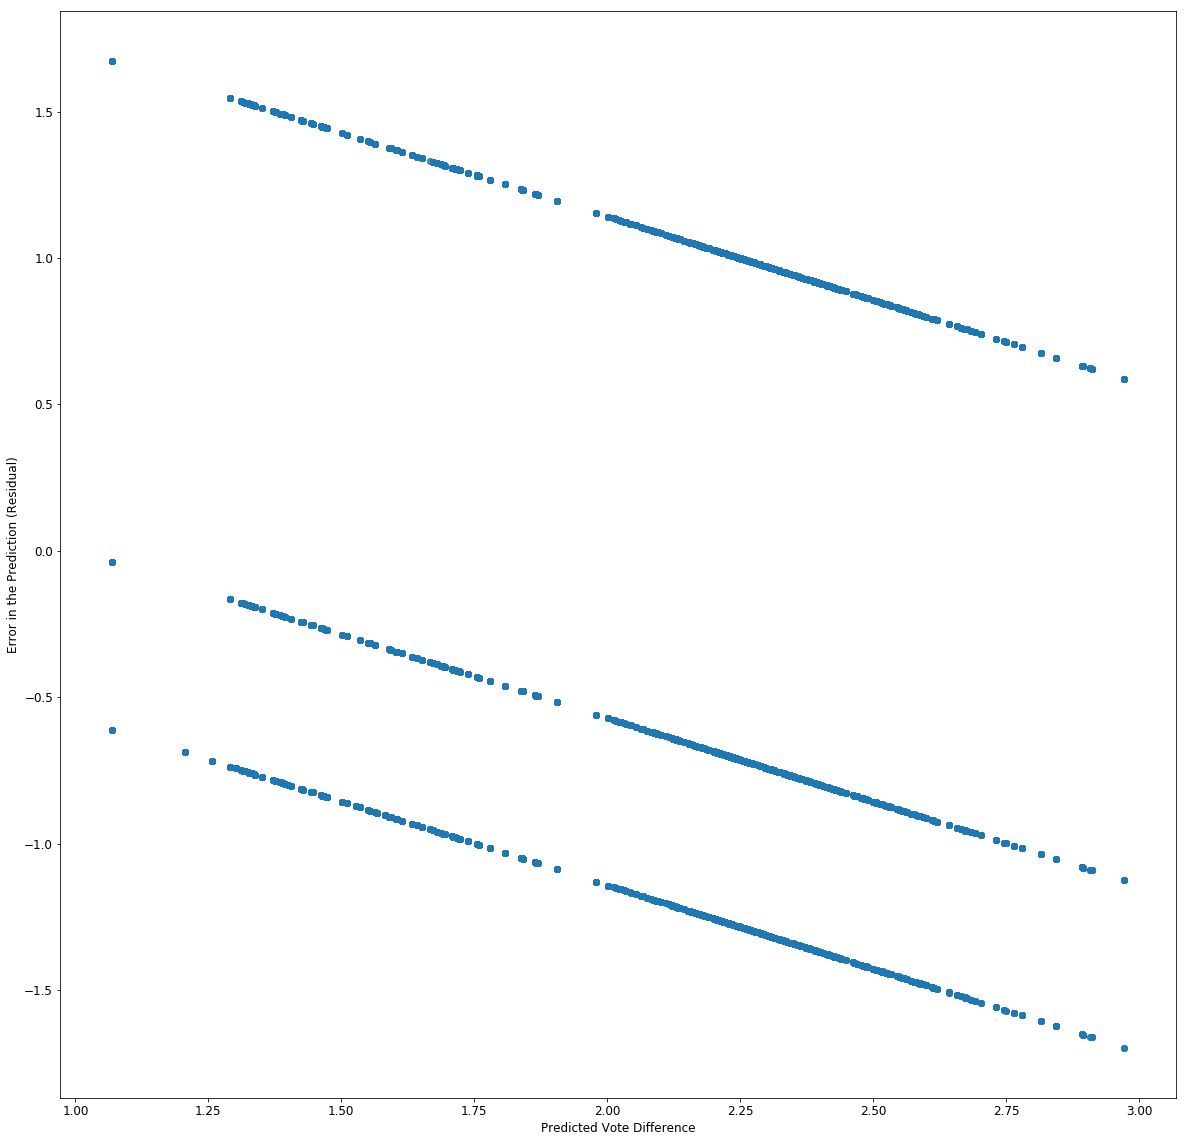

In [79]:
predictions = mod_econ.fittedvalues
residuals = mod_econ.resid_pearson
plt.scatter(predictions, residuals, alpha=0.4)
plt.xlabel('Predicted Vote Difference')
plt.ylabel('Error in the Prediction (Residual)')
plt.show()

In [80]:
# Print the fitted values to see if there is a pattern that I can detect from looking at the numbers instead of just
# the graphics (nothing comes to mind)

mod_aid.fittedvalues

record
0        1.939
1        1.939
2        1.939
3        1.939
4        1.939
5        1.939
6        1.939
7        1.939
8        1.939
9        1.939
10       1.939
11       1.939
12       1.939
13       1.939
14       1.939
15       1.939
16       1.939
17       1.939
18       1.939
19       1.939
20       1.939
21       1.939
22       1.939
23       1.939
24       1.939
25       1.939
26       1.939
27       1.939
28       1.939
29       1.939
30       1.939
31       1.939
32       1.939
33       1.939
34       1.939
35       1.939
36       1.939
37       1.939
38       1.939
39       1.939
40       1.939
41       1.939
42       1.939
43       1.939
44       1.939
45       1.939
46       1.939
47       1.939
48       1.939
49       1.939
50       1.939
51       1.939
52       1.939
53       1.939
54       1.939
55       1.939
56       1.939
57       1.939
58       1.939
59       1.939
60       1.939
61       1.939
62       1.939
63       1.939
64       1.939
65       1.939
66 

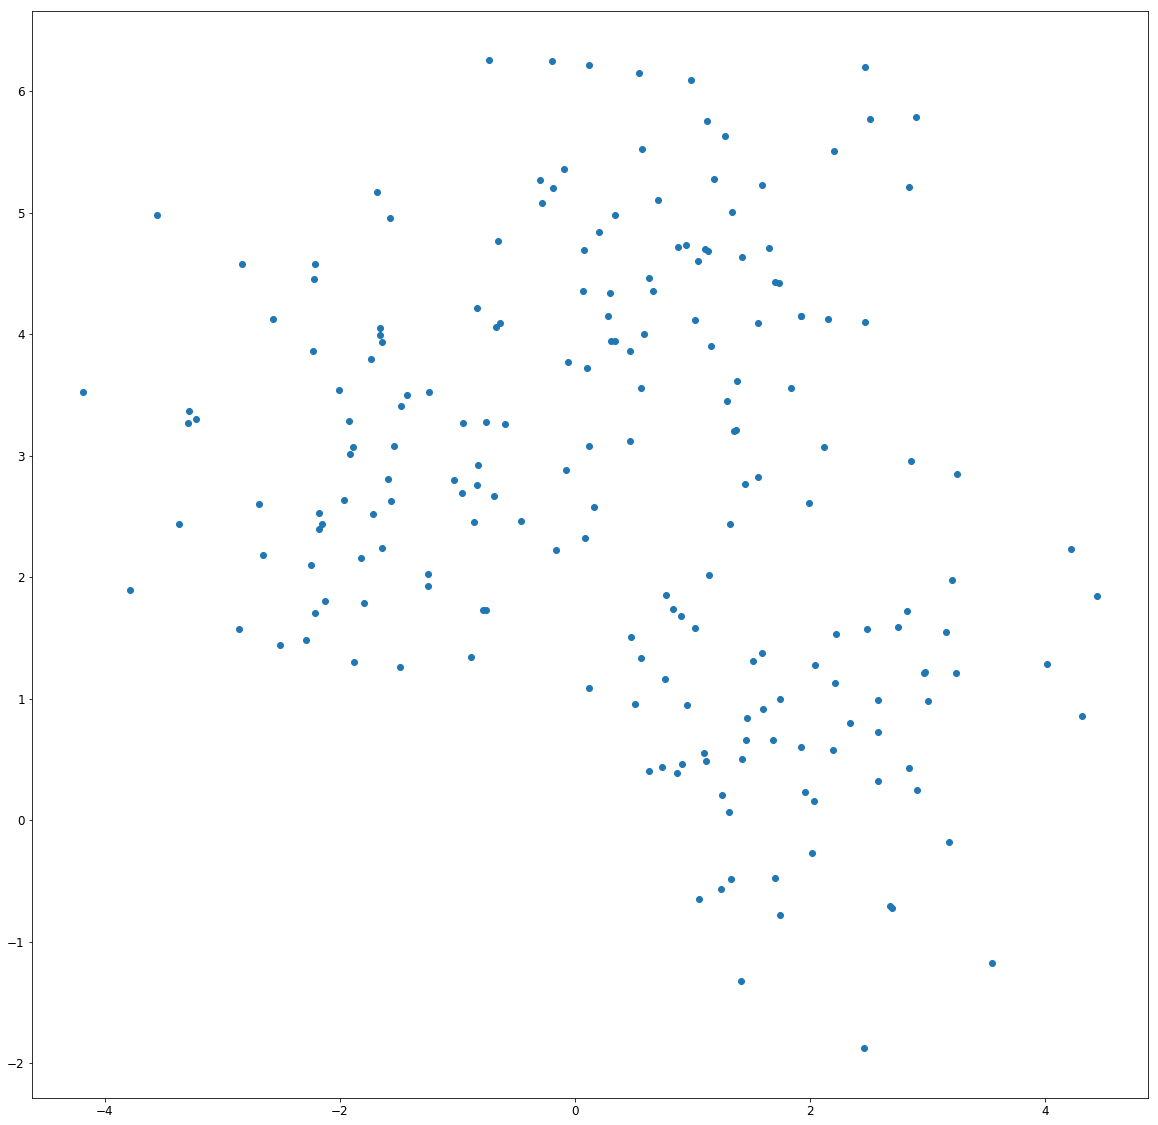

In [81]:
# Generate random data in blob shapes and apply the same tests that are generating the odd set of three diagonal lines,
# to confirm that this is really an artifact of the UN data, and not just an error in my code.

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=3, n_features=2,
                   random_state=0)
plt.scatter(X[:, 0], X[:, 1])

In [82]:
vote_endog = X[:, 0]
vote_exog = X[:, 1:]
vote_exog = sm.add_constant(vote_exog, has_constant='add')
mod_blob = sm.OLS(vote_endog, vote_exog, missing='drop').fit()
print(mod_blob.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.24
Date:                Sun, 24 Nov 2019   Prob (F-statistic):           0.000213
Time:                        00:35:28   Log-Likelihood:                -398.52
No. Observations:                 200   AIC:                             801.0
Df Residuals:                     198   BIC:                             807.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1236      0.228      4.936      0.0

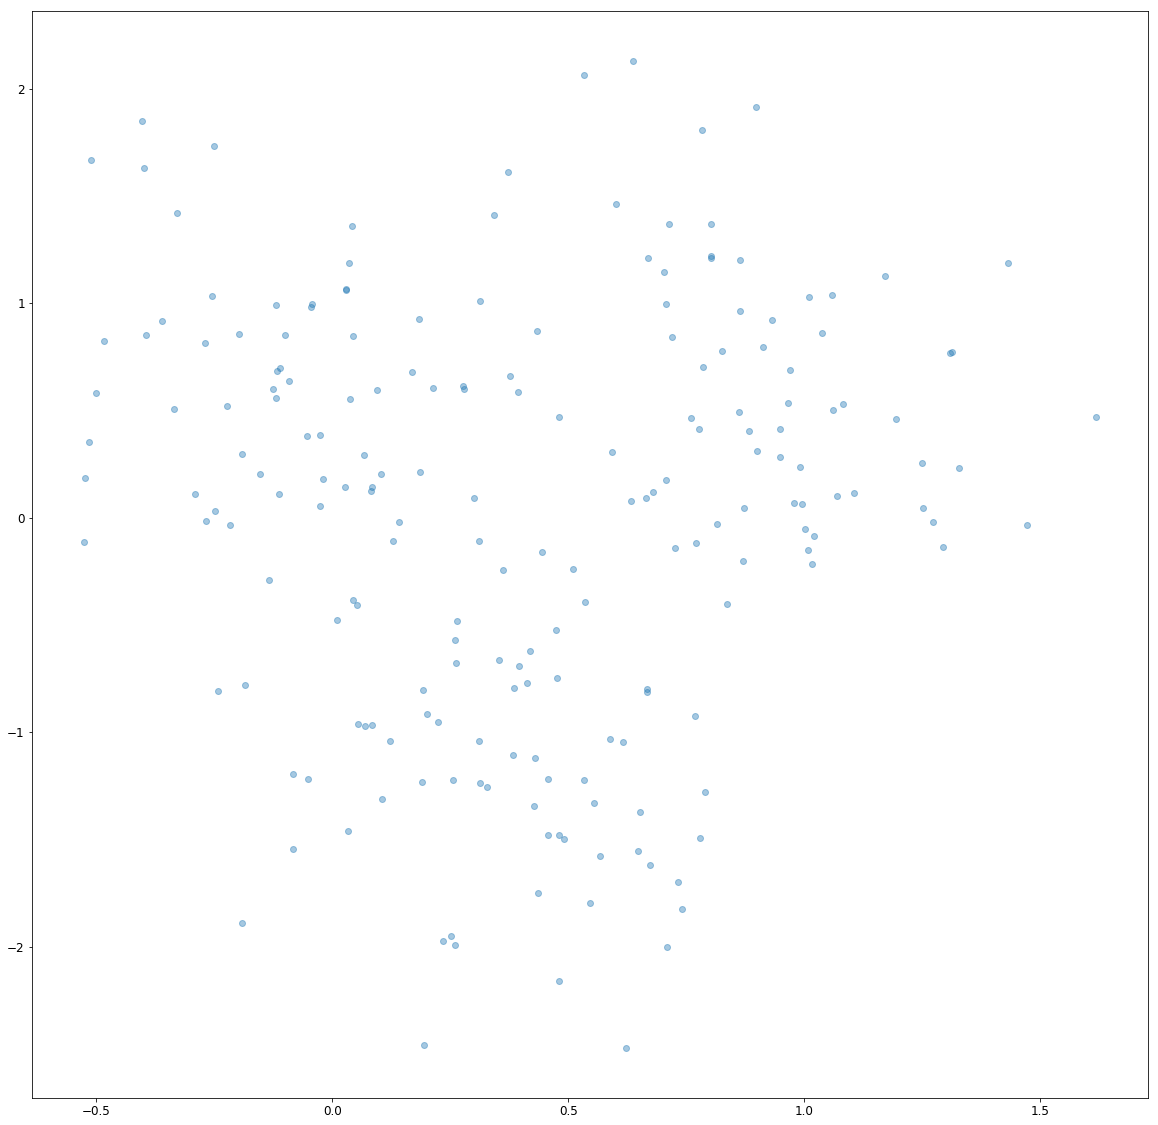

In [83]:
predictions = mod_blob.fittedvalues
residuals = mod_blob.resid_pearson
plt.scatter(predictions, residuals, alpha=0.4)
plt.show()

(array([ 211., 2014., 1690., 1743.,  849., 5461., 9378., 5005., 1862.,
         567.]),
 array([1.06922316, 1.25947404, 1.44972492, 1.6399758 , 1.83022667,
        2.02047755, 2.21072843, 2.40097931, 2.59123018, 2.78148106,
        2.97173194]),
 <a list of 10 Patch objects>)

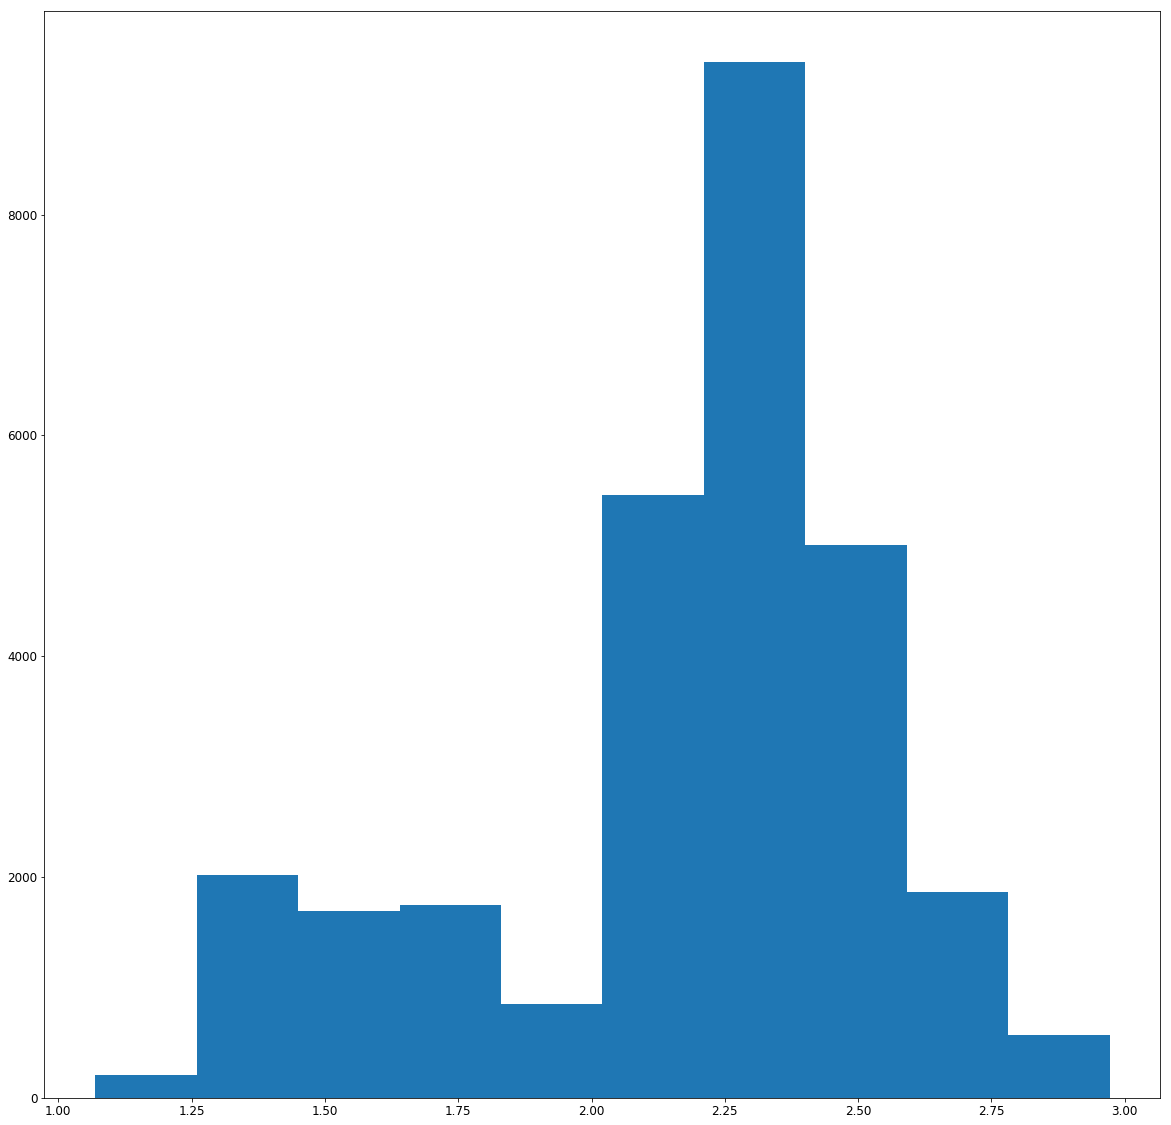

In [84]:
plt.hist(mod_econ.fittedvalues)

In [85]:
mod_econ.fittedvalues

12241    1.980
12242    1.980
12243    1.980
12244    1.980
12245    1.980
12246    1.980
12247    1.980
12248    1.980
12249    1.980
12250    1.980
12251    1.980
12252    1.980
12253    1.980
12254    1.980
12255    1.980
12256    1.980
12257    1.980
12258    1.980
12259    1.980
12260    1.980
12261    1.980
12262    1.980
12263    1.980
12264    1.980
12265    1.980
12266    1.980
12267    1.980
12268    1.980
12269    1.980
12270    1.980
12271    1.980
12272    1.980
12273    1.980
12274    1.980
12275    1.980
12276    1.980
12277    1.980
12278    1.980
12279    1.980
12280    1.980
12281    1.980
12282    1.980
12283    1.980
12284    1.980
12285    1.980
12286    1.980
12287    1.980
12288    1.980
12289    1.980
12290    1.980
12291    1.980
12292    1.980
12293    1.980
12294    1.980
12295    1.980
12296    1.980
12297    1.980
12298    1.980
12299    1.980
12300    1.980
12301    1.980
12302    1.980
12303    1.980
12304    1.980
12305    1.980
12306    1.980
12307    1

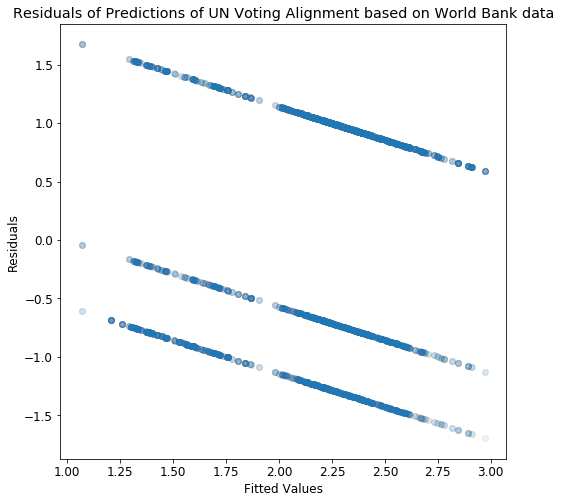

In [86]:
predictions = mod_econ.fittedvalues
residuals = mod_econ.resid_pearson
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams.update({'font.size': 12})

plt.scatter(predictions, residuals, alpha=0.01)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions of UN Voting Alignment based on World Bank data')
plt.show()

The model attempts to smoothly estimate the vote difference, but the true vote difference can only ever be -4, -1, 0, 1, or 4, so the residuals are clustered into three bands, each corresponding to a possible 'true value', e.g., if the true value is +4, then the model is likely to underestimate that true value by a relatively predictable amount. I'm not sure why there aren't five distinct bands; perhaps the model is never so clumsy as to guess a value that is off by more than two bands?

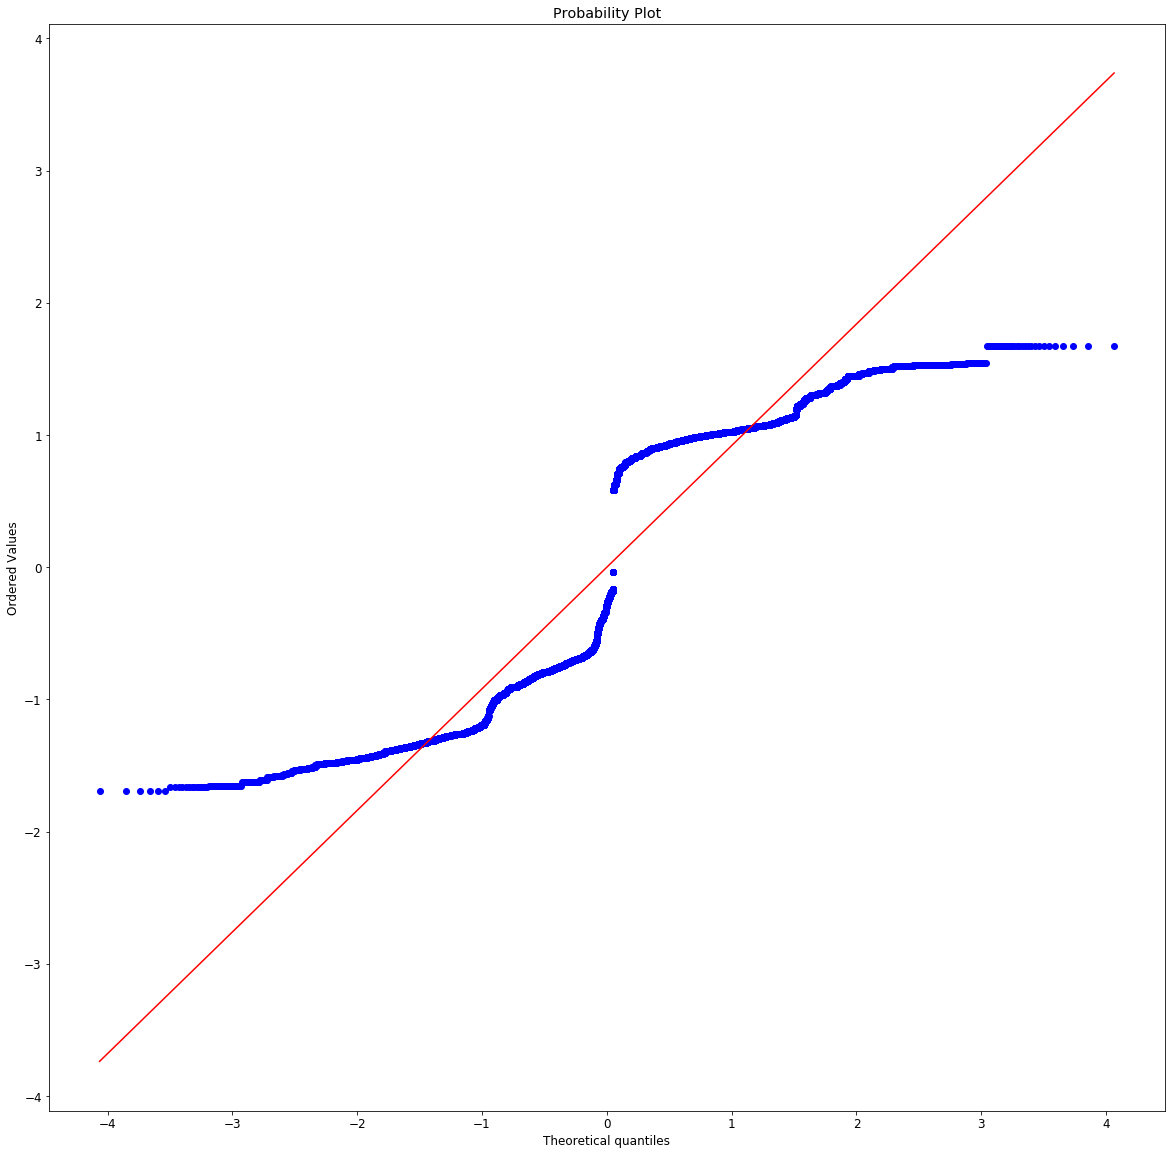

In [87]:
# Create a quantile plot of the UN data to try to understand how it is varying.

import scipy.stats as stats
import pylab

plt.rcParams["figure.figsize"] = (20,20)

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

In [88]:
# This code generates visual plots of the influence and leverage of unusual data points, but it takes too long to run
# and the results are too crowded together to be visually useful, so I have commented them out.

#from statsmodels.graphics.regressionplots import *
#plt.rcParams.update({'font.size': 6})
#plt.rcParams["figure.figsize"] = (20,30)
#plot_leverage_resid2(mod_econ)
#influence_plot(mod_econ)